<a href="https://colab.research.google.com/github/yusufOcakoglu/Deciding_the_MVP/blob/main/Exploratory_Data_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big 4 vs. Anadolu Teams Foul Tolerance Analysis

✅ Veri Seti Yüklendi. Toplam Maç: 2162

📊 TOLERANS İSTATİSTİKLERİ (Faul / Kart)
🦁 Büyük 4 Ortalama : 7.2271 faulde 1 kart
🛡️ Anadolu Ortalama : 6.9701 faulde 1 kart
⚖️ Fark             : 0.2570

🧪 T-TESTİ SONUÇLARI
T-İstatistiği : 1.7163
P-Değeri      : 0.0863002282

❌ SONUÇ: Fark İSTATİSTİKSEL OLARAK ANLAMSIZ.
   -> H0 Reddedilemedi. (p >= 0.05)
   -> Bulduğumuz fark tesadüfi olabilir.


/tmp/ipython-input-82798390.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(



🖼️ Grafik kaydedildi: Analiz_Tolerans_Testi.png


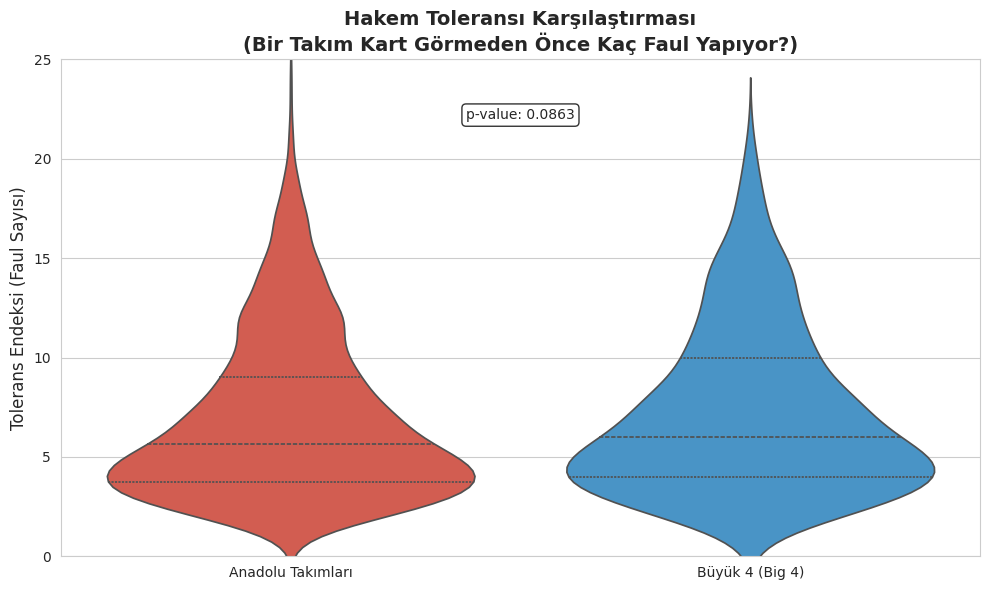

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# 1. VERİYİ YÜKLE
try:
    df = pd.read_csv("TURKISH_SUPER_LIG_FULL_DATASET.csv")
    print(f"✅ Veri Seti Yüklendi. Toplam Maç: {len(df)}")
except FileNotFoundError:
    print("❌ Hata: 'TURKISH_SUPER_LIG_FULL_DATASET.csv' dosyası bulunamadı.")
    exit()

# 2. VERİYİ ANALİZE HAZIRLA (Melt İşlemi)
# Ev sahibi ve Deplasman verilerini alt alta getirip tek bir 'Takım' sütunu yapıyoruz.
# Böylece her satır bir maç değil, bir takımın o maçtaki performansı oluyor.

home_data = df[['Home_is_Big4', 'Home_Foul_Tolerance']].rename(
    columns={'Home_is_Big4': 'Is_Big4', 'Home_Foul_Tolerance': 'Tolerance'}
)

away_data = df[['Away_is_Big4', 'Away_Foul_Tolerance']].rename(
    columns={'Away_is_Big4': 'Is_Big4', 'Away_Foul_Tolerance': 'Tolerance'}
)

# İkisini birleştir
analiz_df = pd.concat([home_data, away_data], ignore_index=True)

# İsimlendirme (Görselde güzel dursun diye)
analiz_df['Kategori'] = analiz_df['Is_Big4'].map({1: 'Büyük 4 (Big 4)', 0: 'Anadolu Takımları'})

# Eksik veya sonsuz verileri temizle (Garanti olsun)
analiz_df = analiz_df.dropna(subset=['Tolerance'])
analiz_df = analiz_df[analiz_df['Tolerance'] < 100] # Aşırı uç değerleri (outlier) temizle

# 3. İSTATİSTİK HESAPLAMA
big4_vals = analiz_df[analiz_df['Is_Big4'] == 1]['Tolerance']
anadolu_vals = analiz_df[analiz_df['Is_Big4'] == 0]['Tolerance']

# Ortalamalar
mean_big4 = big4_vals.mean()
mean_anadolu = anadolu_vals.mean()

print("\n" + "="*40)
print("📊 TOLERANS İSTATİSTİKLERİ (Faul / Kart)")
print("="*40)
print(f"🦁 Büyük 4 Ortalama : {mean_big4:.4f} faulde 1 kart")
print(f"🛡️ Anadolu Ortalama : {mean_anadolu:.4f} faulde 1 kart")
print(f"⚖️ Fark             : {mean_big4 - mean_anadolu:.4f}")

# 4. T-TESTİ (HIPOTEZ TESTİ)
# H0 (Sıfır Hipotezi): İki grubun ortalamaları EŞİTTİR. (Fark şans eseridir)
# H1 (Alternatif): İki grup birbirinden FARKLIDIR. (Kayırma/Ayrımcılık vardır)

t_stat, p_val = stats.ttest_ind(big4_vals, anadolu_vals, equal_var=False)

print("\n" + "="*40)
print("🧪 T-TESTİ SONUÇLARI")
print("="*40)
print(f"T-İstatistiği : {t_stat:.4f}")
print(f"P-Değeri      : {p_val:.10f}") # Virgülden sonra 10 hane göster

if p_val < 0.05:
    print("\n✅ SONUÇ: Fark İSTATİSTİKSEL OLARAK ANLAMLI!")
    print("   -> Hipotez Doğrulandı. (p < 0.05)")
    print("   -> Bu fark şans eseri oluşmadı, sistematik bir durum var.")
else:
    print("\n❌ SONUÇ: Fark İSTATİSTİKSEL OLARAK ANLAMSIZ.")
    print("   -> H0 Reddedilemedi. (p >= 0.05)")
    print("   -> Bulduğumuz fark tesadüfi olabilir.")

# 5. GÖRSELLEŞTİRME (Keman Grafiği - Violin Plot)
# Boxplot'tan daha iyidir çünkü verinin yoğunluğunu da gösterir.
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Çizim
sns.violinplot(
    data=analiz_df,
    x='Kategori',
    y='Tolerance',
    palette=['#e74c3c', '#3498db'], # Kırmızı (Big4) ve Mavi (Anadolu)
    inner="quartile" # Çeyrekler açıklığını göster
)

# Başlıklar
plt.title('Hakem Toleransı Karşılaştırması\n(Bir Takım Kart Görmeden Önce Kaç Faul Yapıyor?)', fontsize=14, fontweight='bold')
plt.ylabel('Tolerans Endeksi (Faul Sayısı)', fontsize=12)
plt.xlabel('')
plt.ylim(0, 25) # Grafiği sıkıştırıp netleştirmek için (Çok uç değerleri gösterme)

# P-Değerini grafiğe yaz
plt.text(
    0.5, 22,
    f"p-value: {p_val:.4f}",
    ha='center',
    bbox=dict(boxstyle="round", fc="white", ec="black", alpha=0.8)
)

plt.tight_layout()
plt.savefig("Analiz_Tolerans_Testi.png", dpi=300)
print("\n🖼️ Grafik kaydedildi: Analiz_Tolerans_Testi.png")
plt.show()


--- 1. EV SAHİBİ vs DEPLASMAN FARKI ---
Ev Sahibi Maçlarında Farkın P-Değeri: 0.38930
SONUÇ: Evinde oynarken bile fark yok.
Grafik kaydedildi: Analiz_Home_Away.png


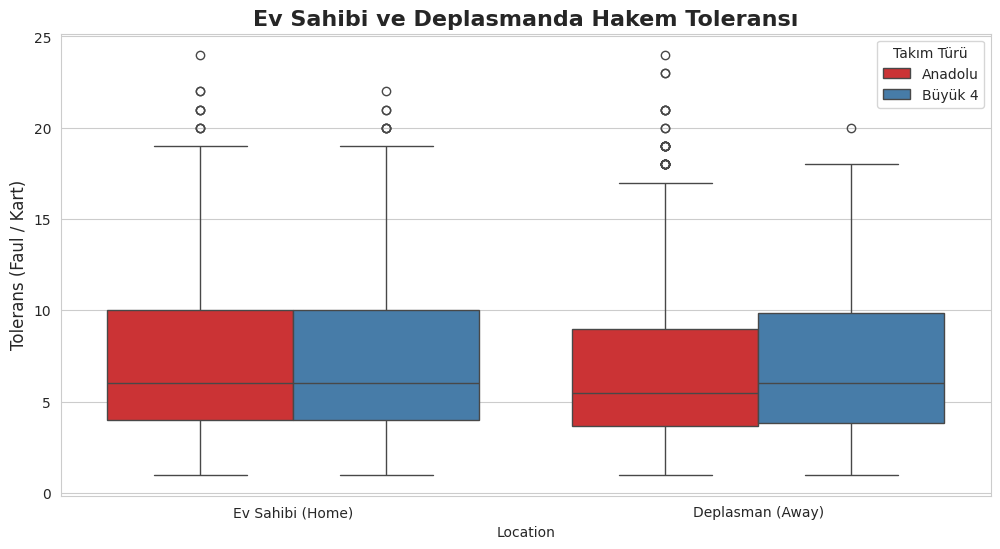

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Veriyi yükle
df = pd.read_csv("TURKISH_SUPER_LIG_FULL_DATASET.csv")

# Görsel ayarları
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# ---------------------------------------------------------
# ANALİZ 1: EV SAHİBİ - DEPLASMAN AYRIMI
# ---------------------------------------------------------
print("\n--- 1. EV SAHİBİ vs DEPLASMAN FARKI ---")

# Veriyi hazırlama (Melt)
home = df[['Home_is_Big4', 'Home_Foul_Tolerance']].rename(columns={'Home_is_Big4': 'Is_Big4', 'Home_Foul_Tolerance': 'Tolerance'})
home['Location'] = 'Ev Sahibi (Home)'

away = df[['Away_is_Big4', 'Away_Foul_Tolerance']].rename(columns={'Away_is_Big4': 'Is_Big4', 'Away_Foul_Tolerance': 'Tolerance'})
away['Location'] = 'Deplasman (Away)'

full_data = pd.concat([home, away], ignore_index=True)
full_data['Category'] = full_data['Is_Big4'].map({1: 'Büyük 4', 0: 'Anadolu'})
full_data = full_data[full_data['Tolerance'] < 25] # Uç değer temizliği

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Tolerance', hue='Category', data=full_data, palette="Set1")
plt.title('Ev Sahibi ve Deplasmanda Hakem Toleransı', fontsize=16, weight='bold')
plt.ylabel('Tolerans (Faul / Kart)', fontsize=12)
plt.legend(title='Takım Türü')

# T-Testi: Sadece Ev Sahibi Maçlarında Fark Var mı?
home_big4 = full_data[(full_data['Location'] == 'Ev Sahibi (Home)') & (full_data['Category'] == 'Büyük 4')]['Tolerance']
home_anadolu = full_data[(full_data['Location'] == 'Ev Sahibi (Home)') & (full_data['Category'] == 'Anadolu')]['Tolerance']
t_stat, p_val = stats.ttest_ind(home_big4, home_anadolu)

print(f"Ev Sahibi Maçlarında Farkın P-Değeri: {p_val:.5f}")
if p_val < 0.05:
    print("SONUÇ: Büyük takımlar EVİNDE oynarken istatistiksel olarak kayırılıyor!")
    plt.text(0, 22, "İSTATİSTİKSEL OLARAK ANLAMLI FARK!", ha='center', color='red', weight='bold')
else:
    print("SONUÇ: Evinde oynarken bile fark yok.")

plt.savefig("Analiz_Home_Away.png")
print("Grafik kaydedildi: Analiz_Home_Away.png")

✅ Veri Yüklendi. Toplam Maç: 2162

📼 VAR ÖNCESİ VE SONRASI KAYIRMA ANALİZİ

--- VAR YOK (2017-18) ---
Big 4 Ort. Tolerans : 7.90
Anadolu Ort. Tolerans: 6.71
Fark (Avantaj)       : 1.20
P-Değeri             : 0.01413
SONUÇ: İstatistiksel olarak ANLAMLI fark var. (Kayırma Var)

--- VAR VAR (2018-Günümüz) ---
Big 4 Ort. Tolerans : 7.14
Anadolu Ort. Tolerans: 6.99
Fark (Avantaj)       : 0.15
P-Değeri             : 0.34712
SONUÇ: İstatistiksel olarak anlamlı fark YOK. (Eşitlik Var)

🖼️ Grafik kaydedildi: Analiz_VAR_Etkisi.png


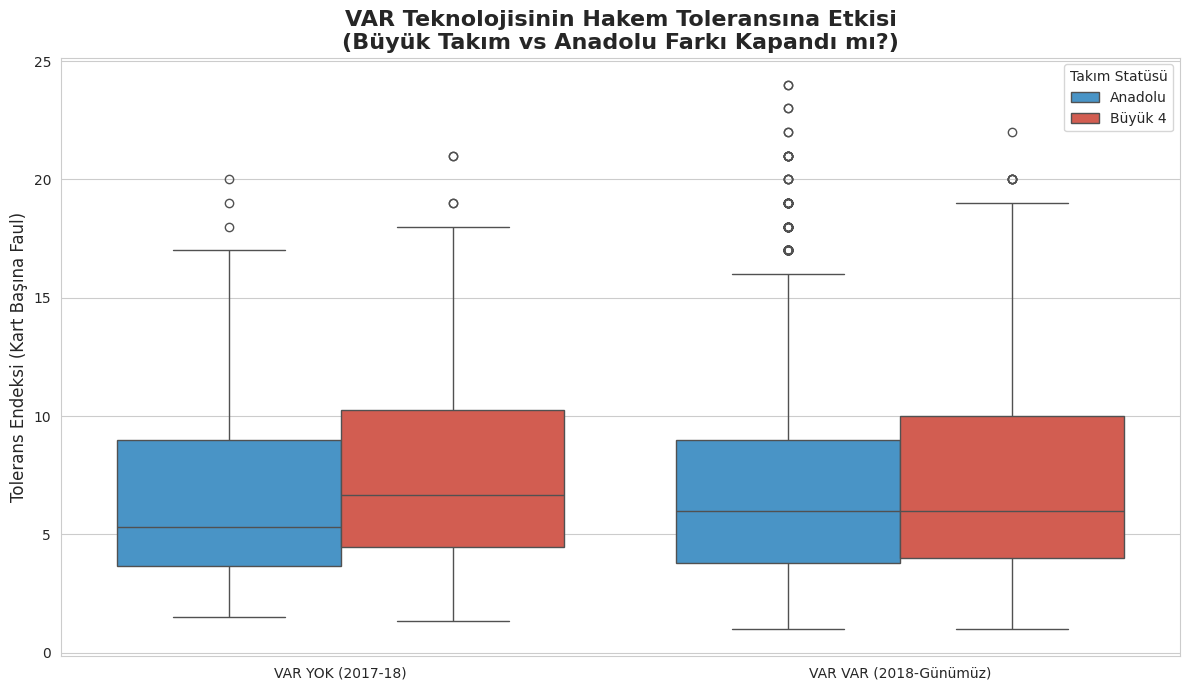

In [10]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# 1. VERİYİ YÜKLE
try:
    df = pd.read_csv("TURKISH_SUPER_LIG_FULL_DATASET.csv")
    print(f"✅ Veri Yüklendi. Toplam Maç: {len(df)}")
except FileNotFoundError:
    print("❌ Hata: Dosya bulunamadı.")
    exit()

# 2. VERİYİ HAZIRLA
# Ev sahibi ve Deplasman verilerini birleştirip tek bir "Takım Performansı" havuzu yapalım
home_df = df[['Season', 'Home_is_Big4', 'Home_Foul_Tolerance']].rename(
    columns={'Home_is_Big4': 'Is_Big4', 'Home_Foul_Tolerance': 'Tolerance'}
)
away_df = df[['Season', 'Away_is_Big4', 'Away_Foul_Tolerance']].rename(
    columns={'Away_is_Big4': 'Is_Big4', 'Away_Foul_Tolerance': 'Tolerance'}
)
full_df = pd.concat([home_df, away_df], ignore_index=True)

# Temizlik (Uç değerler ve eksikler)
full_df = full_df.dropna()
full_df = full_df[full_df['Tolerance'] < 25]

# 3. VAR DÖNEMLERİNİ AYIR
# Sezon formatın '1718', '1819' şeklinde string.
# 1718 -> VAR YOK
# 1819 ve sonrası -> VAR VAR

def define_var_period(season):
    season = str(season)
    if season == '1718':
        return 'VAR YOK (2017-18)'
    else:
        return 'VAR VAR (2018-Günümüz)'

full_df['VAR_Status'] = full_df['Season'].apply(define_var_period)
full_df['Category'] = full_df['Is_Big4'].map({1: 'Büyük 4', 0: 'Anadolu'})

# 4. İSTATİSTİKSEL TESTLER (PRE-VAR vs POST-VAR)
print("\n" + "="*50)
print("📼 VAR ÖNCESİ VE SONRASI KAYIRMA ANALİZİ")
print("="*50)

periods = ['VAR YOK (2017-18)', 'VAR VAR (2018-Günümüz)']

for period in periods:
    period_data = full_df[full_df['VAR_Status'] == period]

    big4_tol = period_data[period_data['Is_Big4'] == 1]['Tolerance']
    anadolu_tol = period_data[period_data['Is_Big4'] == 0]['Tolerance']

    # T-Test
    t_stat, p_val = stats.ttest_ind(big4_tol, anadolu_tol, equal_var=False)

    diff = big4_tol.mean() - anadolu_tol.mean()

    print(f"\n--- {period} ---")
    print(f"Big 4 Ort. Tolerans : {big4_tol.mean():.2f}")
    print(f"Anadolu Ort. Tolerans: {anadolu_tol.mean():.2f}")
    print(f"Fark (Avantaj)       : {diff:.2f}")
    print(f"P-Değeri             : {p_val:.5f}")

    if p_val < 0.05:
        print("SONUÇ: İstatistiksel olarak ANLAMLI fark var. (Kayırma Var)")
    else:
        print("SONUÇ: İstatistiksel olarak anlamlı fark YOK. (Eşitlik Var)")

# 5. GÖRSELLEŞTİRME (Trend Değişimi)
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

sns.boxplot(
    data=full_df,
    x='VAR_Status',
    y='Tolerance',
    hue='Category',
    palette=['#3498db', '#e74c3c'],
    showfliers=True # İstersen uç değerleri gizlemek için (grafik daha temiz durur)
)

plt.title('VAR Teknolojisinin Hakem Toleransına Etkisi\n(Büyük Takım vs Anadolu Farkı Kapandı mı?)', fontsize=16, fontweight='bold')
plt.ylabel('Tolerans Endeksi (Kart Başına Faul)', fontsize=12)
plt.xlabel('')
plt.legend(title='Takım Statüsü')

# Grafiği Kaydet
plt.tight_layout()
plt.savefig("Analiz_VAR_Etkisi.png", dpi=300)
print("\n🖼️ Grafik kaydedildi: Analiz_VAR_Etkisi.png")
plt.show()